In [6]:
# geom
IRC_1 = """
    C       -0.13928700    0.53812100    0.00000000 
    H       -0.45588900    1.55965200    0.00000000 
    N        0.15217400   -0.57339600    0.00000000 
    """
IRC_9 = """
    C       -0.05408400    0.56857600    0.00000000 
    H       -0.91785300    1.21534300    0.00000000 
    N        0.11240700   -0.57471400    0.00000000 
    """
IRC_15 = """
    C       -0.00272700    0.59599900    0.00000000 
    H       -1.08980000    0.79640500    0.00000000 
    N        0.08077100   -0.56806300    0.00000000 
    """
IRC_22 = """
    C        0.04225713    0.62788977    0.00000000  
    H       -1.09028387    0.25268477    0.00000000  
    N        0.04225713   -0.55625923    0.00000000 
    """
IRC_31 = """
    C        0.09523700    0.66006400    0.00000000 
    H       -1.06094900   -0.45447800    0.00000000 
    N       -0.00525600   -0.53293600    0.00000000 
    """
IRC_38 = """     
    C        0.13600700    0.66802300    0.00000000  
    H       -0.94448900   -0.98136100    0.00000000  
    N       -0.04857600   -0.50183500    0.00000000 
    """
IRC_47 = """
    C         0.18408000    0.66197400    0.00000000 
    H        -0.45300100   -1.41602100    0.00000000 
    N        -0.12514500   -0.46536800    0.00000000 
    """

In [7]:
# rhf/ccsd/fci with sto3g
import numpy as np 
from pyscf import gto,scf,cc,fci,mcscf,mp 
IRC_mols = [IRC_1, IRC_9, IRC_15, IRC_22, IRC_31, IRC_38, IRC_47] 
irc_steps = [-3.40147, -2.1075, -1.13477, 0, 1.45901, 2.59308, 4.03862] 

rhf_list=[] 
fci_list=[] 
ccsd_list=[] 

for R in range(0,7):
    
    mol = gto.M(atom = IRC_mols[R], basis = 'sto-3g', verbose=3)

    
    molRHF = scf.RHF(mol)
    energy_RHF = molRHF.kernel()
    rhf_list.append(energy_RHF)
     
#   molMP2 = mp.MP2(molRHF)
#   energy_MP2 = molMP2.kernel()[0] + energy_RHF
#   mp2_list.append(energy_MP2)

    molCCSD = cc.RCCSD(molRHF)
    energy_CCSD = molCCSD.kernel()[0]+energy_RHF
    ccsd_list.append(energy_CCSD)

    molFCI = fci.FCI(mol, molRHF.mo_coeff)
    molFCI.nroots = 2
    #molFCI = fci.addons.fix_spin_(molFCI, ss=2) # S*(S+1)
    energy_FCI = molFCI.kernel()[0][0]
    fci_list.append(energy_FCI)

converged SCF energy = -91.675060570811
E(CCSD) = -91.83641331812979  E_corr = -0.1613527473188199
converged SCF energy = -91.6444793922084
E(CCSD) = -91.81317412671581  E_corr = -0.1686947345074604
converged SCF energy = -91.5958822171058
E(CCSD) = -91.769403404822  E_corr = -0.1735211877161615
converged SCF energy = -91.5617093262299
E(CCSD) = -91.71218965634976  E_corr = -0.1504803301198914
converged SCF energy = -91.5962139943461
E(CCSD) = -91.73217183796002  E_corr = -0.1359578436139482
converged SCF energy = -91.624758057243
E(CCSD) = -91.76370322802734  E_corr = -0.1389451707843044
converged SCF energy = -91.6442883918627
E(CCSD) = -91.78367512947578  E_corr = -0.1393867376131125


In [25]:
 
print("rhf_list = ", rhf_list)
print("fci_list = ", fci_list)
print("ccsd_list = ", ccsd_list)

rhf_list =  [-91.67506057081098, -91.64447939220835, -91.59588221710584, -91.56170932622987, -91.59621399434607, -91.62475805724303, -91.64428839186267]
fci_list =  [-91.83971796210429, -91.81711292166142, -91.77516357835921, -91.71796468531548, -91.7384053714786, -91.77120205213365, -91.79025416819162]
ccsd_list =  [-91.8364133181298, -91.81317412671581, -91.769403404822, -91.71218965634976, -91.73217183796002, -91.76370322802734, -91.78367512947578]


In [12]:
# dft results by gaussian (keywaords；irc=(CalcFC,Recalc=10,maxpoints=200,stepsize=15, LQA) b3lyp/6-311+g(d,p)
irc_steps_long=[-3.401470, -3.240690, -3.079300, -2.917570, -2.755680, 
                -2.593700, -2.431660, -2.269590, -2.107500, -1.945400, 
                -1.783270, -1.621140, -1.459020, -1.296890, -1.134770, 
                -0.972640, -0.810530, -0.648410, -0.486310, -0.324240, 
                -0.162160,  0,  0.162160,  0.324260,  0.486370,  
                0.648490,  0.810570,  0.972650,  1.134760,  1.296890,  
                1.459010,  1.621130, 1.783250,  1.945350,  2.107340,  
                2.269310,  2.431220,  2.593080,  2.754860,  2.916530,  
                3.078070,  3.239410,  3.400750,  3.562420,  3.722110,  
                3.881050,  4.038620 ]
dft_list=[-93.4544242485, -93.4538553509, -93.4527343718, -93.4510505163, 
          -93.4488157265, -93.4460464920, -93.4427622649, -93.4389891355, 
          -93.4347597417, -93.4301151831, -93.4251053072, -93.4197841714, 
          -93.4142436553, -93.4085797396, -93.4029148887, -93.3973965367, 
          -93.3921968085, -93.3875110777, -93.3835519474, -93.3805340496, 
          -93.3786478416, -93.3780092332, -93.3786201268, -93.3803201036, 
          -93.3828000407, -93.3856832484, -93.3886895189, -93.3917153163,
          -93.3947548636, -93.3978251798, -93.4009255274, -93.4040322921, 
          -93.4071099110, -93.4101072442, -93.4129987594, -93.4157443244, 
          -93.4183126811, -93.4206767996, -93.4228173074, -93.4247228429, 
          -93.4263894514, -93.4278175861, -93.4290252674, -93.4299664470, 
          -93.4306917136, -93.4311876055, -93.4314554287 ]


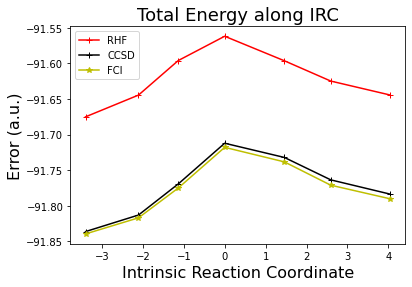

In [56]:
import matplotlib.pyplot as plt 
plt.title("Total Energy along IRC", fontsize=18) 
plt.xlabel("Intrinsic Reaction Coordinate", fontsize=16) 
plt.ylabel("Error (a.u.)",fontsize=16) 
plt.plot(irc_steps, rhf_list, 'r+-', label = 'RHF') 
#plt.plot(irc_steps_long, dft_list, 'g+-', label = 'DFT') 
plt.plot(irc_steps, ccsd_list, 'k+-', label = 'CCSD') 
plt.plot(irc_steps, fci_list, 'y*-', label = 'FCI') 

#plt.ylim(-77.25,-77.1) 
#plt.xlim(0,180) 
plt.legend(loc = 2) 
plt.show()

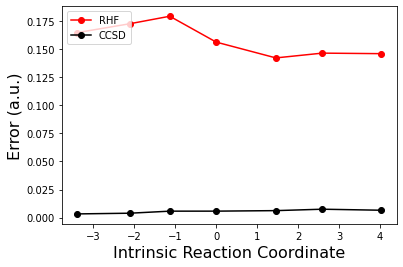

In [57]:
import matplotlib.pyplot as plt 
#plt.title("Total Energy along IRC", fontsize=18) 
plt.xlabel("Intrinsic Reaction Coordinate", fontsize=16) 
plt.ylabel("Error (a.u.)",fontsize=16) 
plt.plot(irc_steps, [rhf_list[i] - fci_list[i] for i in range(0,7)], 'ro-', label = 'RHF')  
plt.plot(irc_steps, [ccsd_list[i] - fci_list[i] for i in range(0,7)], 'ko-', label = 'CCSD') 
#plt.plot(irc_steps, fci_list, 'y*-', label = 'FCI') 

#plt.ylim(-77.25,-77.1) 
#plt.xlim(0,0.17) 
plt.legend(loc = 2) 
plt.show()

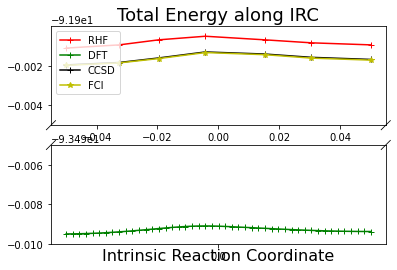

In [46]:
import matplotlib.pyplot as plt 
from brokenaxes import brokenaxes
bax = brokenaxes(ylims=((-93.5,-93.495),(-91.905,-91.9)),despine=False)
plt.title("Total Energy along IRC", fontsize=18) 
plt.xlabel("Intrinsic Reaction Coordinate", fontsize=16) 
#plt.ylabel("Total Energy (a.u.)",fontsize=16) 
plt.plot(irc_steps, rhf_list, 'r+-', label = 'RHF') 
plt.plot(irc_steps_long, dft_list, 'g+-', label = 'DFT') 
plt.plot(irc_steps, ccsd_list, 'k+-', label = 'CCSD') 
plt.plot(irc_steps, fci_list, 'y*-', label = 'FCI') 

#plt.ylim(-92.0,-91.5) 
#plt.ylim(-93.5,-93.25)
#plt.xlim(0,180) 
plt.legend(loc = 2) 
plt.show()